In [36]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
with open("E:\\Research\\Statue gen output\\Curve_300Gen_7.txt", 'r') as f:
    PARAMS = f.readlines()

In [4]:
from ast import literal_eval

In [5]:
PARAMS=literal_eval(PARAMS[0])

In [19]:
GEN=0
C=1

In [20]:
model=PARAMS[GEN][C][8][0]
model

[[0.306802, 0.959241, -1.245622],
 [4.034938, -0.026712, -2.564639],
 [4.167405, 1.162164, -0.433668],
 [-4.72308, -0.508864, 0.424047],
 [-0.324179, -0.99434, -1.222152],
 [4.335702, 0.57658, -0.607921],
 [-0.304752, -0.67321, -1.729955],
 [-1.966229, 1.54264, 2.255365],
 [0.367227, 0.925099, -3.094939],
 [-0.693587, 4.49921, 2.403857],
 [-1.068383, 5.960008, 2.844177],
 [0.514684, 1.139447, 2.45686],
 [0.121129, -0.418931, -3.956704]]

In [21]:
x=[m[0] for m in model]
y=[m[1] for m in model]
z=[m[2] for m in model]

In [22]:
print(x,'\n',y,'\n',z,'\n')

[0.306802, 4.034938, 4.167405, -4.72308, -0.324179, 4.335702, -0.304752, -1.966229, 0.367227, -0.693587, -1.068383, 0.514684, 0.121129] 
 [0.959241, -0.026712, 1.162164, -0.508864, -0.99434, 0.57658, -0.67321, 1.54264, 0.925099, 4.49921, 5.960008, 1.139447, -0.418931] 
 [-1.245622, -2.564639, -0.433668, 0.424047, -1.222152, -0.607921, -1.729955, 2.255365, -3.094939, 2.403857, 2.844177, 2.45686, -3.956704] 



In [54]:
def plot_points(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,y,z)
    #plt.show()

In [32]:
GENERATIONS=300
OUTPUT_PATH="E:\\Research\\Statue Generator\\Generations"
POPULATION_SIZE=10

In [37]:
def shannon_entropy(file_path):
    with open(file_path, "rb") as f:
        bytes = f.read()
    prob = [float(bytes.count(b)) / len(bytes) for b in set(bytes)]
    entropy = -sum([p * math.log(p) / math.log(2.0) for p in prob])
    return round(entropy,6)

In [43]:
%%time

ALL_FITNESS=[]
BEST_FITNESS=[]
GEN_NUM=1

for _ in range(GENERATIONS+1):
    
    PATH_FOR_PREV_GEN=OUTPUT_PATH+"\\GEN_"+str(GEN_NUM-1)
    FITNESS=[]
    
    if (GEN_NUM-1)%50==0:
    
        for i in range(POPULATION_SIZE):

            VERTS=PARAMS[GEN_NUM-1][i][8][0]
            EDGES=PARAMS[GEN_NUM-1][i][8][1]

            #angle,angle_bins=calculate_angles(VERTS,EDGES)

            entropy=shannon_entropy(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")
            entropy=entropy/8 

            fitness=entropy
            FITNESS.append(round(fitness,6))

        ALL_FITNESS.append(FITNESS)

        BEST_FITNESS.append(FITNESS.index(max(FITNESS)))
        print(f'Statue-{FITNESS.index(max(FITNESS))} has the best fitness value in {GEN_NUM-1} generation.')

        MODELS=[]

        #appending the mutated childs to PARAMS array
        PARAMS.append(MODELS)

    GEN_NUM+=1

Statue-1 has the best fitness value in 0 generation.
Statue-2 has the best fitness value in 50 generation.
Statue-3 has the best fitness value in 100 generation.
Statue-4 has the best fitness value in 150 generation.
Statue-4 has the best fitness value in 200 generation.
Statue-9 has the best fitness value in 250 generation.
Statue-2 has the best fitness value in 300 generation.
Wall time: 25.7 s


In [48]:
GENS=[0,50,100,150,200,250,300]

In [49]:
BEST_FITNESS

[1, 2, 3, 4, 4, 9, 2]

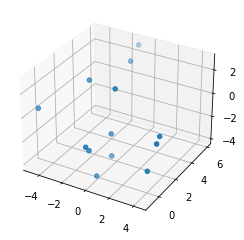

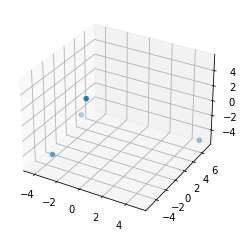

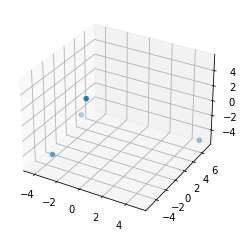

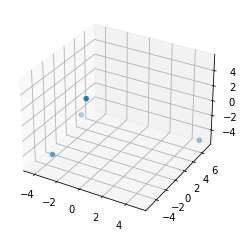

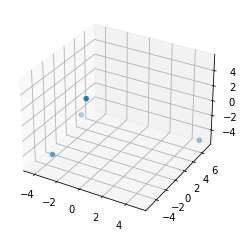

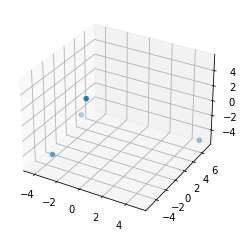

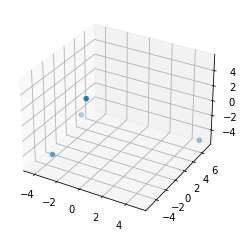

In [55]:
fig = plt.figure(figsize=plt.figaspect(0.5))
for i,m in enumerate(BEST_FITNESS):
    model=PARAMS[GENS[i]][m][8][0]
    
    x=[m[0] for m in model]
    y=[m[1] for m in model]
    z=[m[2] for m in model]
    
    print(f'GENERATION')
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter(x,y,z)
    plot_points(x,y,z)